### Stress in humans can be classified into eustress, neustress and distress. Eustress is considered to be “good” stress and can motivate a person to elevated performance . Neutral stress is called neustress. As it does not cause any harm to the well-being of a person, it can be ignored. Stress with negative effects on the human body is called distress and is an important type of stress to focus on.
* in our dataset the eustress ==0,neustress ==1 and distress ==2

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Users\Arvind\Favorites\Downloads\archive (2)\Stress-Lysis.csv')

In [3]:
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [4]:
df.isna().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

In [5]:
df.kurtosis()

Humidity       -1.200000
Temperature    -1.200000
Step count     -1.209847
Stress Level   -1.299075
dtype: float64

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


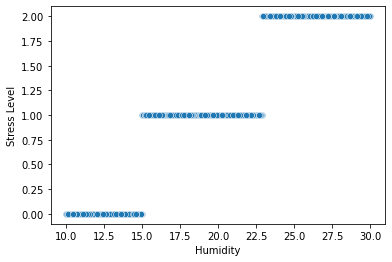

In [45]:
sns.scatterplot(df.Humidity,df['Stress Level'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature', ylabel='Stress Level'>

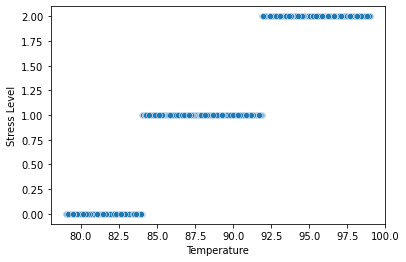

In [9]:
sns.scatterplot(df.Temperature,df['Stress Level'])

In [10]:
df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


#  Checking correaltion 

In [11]:
corr=df.corr()

In [12]:
corr.head()

,Humidity,Temperature,Step count,Stress Level
Humidity,1.000000,1.000000,0.870486,0.936036
Temperature,1.000000,1.000000,0.870486,0.936036
Step count,0.870486,0.870486,1.000000,0.832623
Stress Level,0.936036,0.936036,0.832623,1.000000


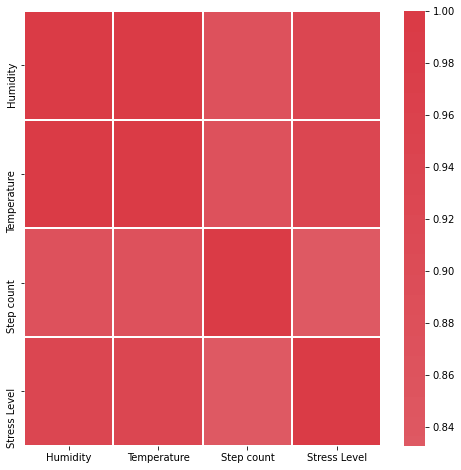

In [53]:
f,ax=plt.subplots(figsize=(8,8))

cmap=sns.diverging_palette(220,10,as_cmap=True)
heat_map=sns.heatmap(corr,cmap=cmap, linewidths=1,center=0.0,vmax=1,ax=ax)
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler


In [15]:
sc=StandardScaler()
X=sc.fit_transform(df)

In [16]:
x=pd.DataFrame(X,columns=df.columns)

In [17]:
x.head()

,Humidity,Temperature,Step count,Stress Level
0,0.230248,0.230248,0.392972,-0.135488
1,0.244097,0.244097,-0.122772,-0.135488
2,1.232604,1.232604,1.647949,1.161696
3,1.322626,1.322626,1.321311,1.161696
4,-1.580572,-1.580572,-0.225920,-1.432672


In [18]:
x['Stress Level'].unique()

array([-0.13548796,  1.16169578, -1.4326717 ])

#  after using standard scalling we get stress level values as 
0--->-0.135,1-->-1.43267,2--->1.11616

In [19]:
df.shape

(2001, 4)

#  Machine learning

In [31]:
from sklearn.svm import SVC

In [32]:
svc=SVC()

In [33]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Stress Level',axis=1),df['Stress Level'],test_size=0.25)

In [34]:
x_train.head()

,Humidity,Temperature,Step count
1697,15.06,84.06,51
1853,12.27,81.27,45
1303,27.00,96.00,184
1487,22.20,91.20,96
765,12.83,81.83,10


In [35]:
svc.fit(x_train,y_train)

SVC()

In [36]:
svc.score(x_test,y_test)

1.0

In [37]:
svc.predict([x_test.iloc[20]])

array([0], dtype=int64)

In [46]:
y_pred=svc.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_pred,y_test)

1.0

# save the model into pickel format for future use

In [49]:
import joblib

In [50]:
joblib.dump(svc,'stress.joblib')

['stress.joblib']

In [51]:
new=joblib.load('stress.joblib')